In [1]:
#import all the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import the dataset
dataset=pd.read_csv(r'F:\Downloads\train_NIR5Yl1.csv')

In [3]:
#Overview of dataset
dataset.head(9)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
5,345568,r,440.0,1.0,23866,5577.0,4.0
6,376865,c,147.0,1.0,10759,17184.0,17.0
7,467378,j,2269.0,2.0,54623,312.0,3.0
8,393640,j,111.0,2.0,172926,53738.0,79.0


In [4]:
#As we can see that ID and Username are not going to makeimpact on upvotes
#So let's drop it
dataset.drop(['ID','Username'],inplace=True,axis=1)

In [5]:
'''
Question Definition :   An online question and answer platform has hired you as a data scientist to identify the 
                        best question authors on the platform. This identification will bring more insight into 
                        increasing the user engagement. Given the tag of the question, number of views received, 
                        number of answers, username and reputation of the question author, the problem requires 
                        you to predict the upvote count that the question will receive.
Variable Definition
ID = Question ID
Tag = Anonymised tags representing question category
Reputation = Reputation score of question author
Answers = Number of times question has been answered
Username = Anonymised user id of question author
Views = Number of times question has been viewed
Upvotes = (Target) Number of upvotes for the question'''

'\nQuestion Definition :   An online question and answer platform has hired you as a data scientist to identify the \n                        best question authors on the platform. This identification will bring more insight into \n                        increasing the user engagement. Given the tag of the question, number of views received, \n                        number of answers, username and reputation of the question author, the problem requires \n                        you to predict the upvote count that the question will receive.\nVariable Definition\nID = Question ID\nTag = Anonymised tags representing question category\nReputation = Reputation score of question author\nAnswers = Number of times question has been answered\nUsername = Anonymised user id of question author\nViews = Number of times question has been viewed\nUpvotes = (Target) Number of upvotes for the question'

In [7]:
#let's check if there is null value in the dataset
dataset.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
Upvotes       0
dtype: int64

In [9]:
dataset.describe()

,Reputation,Answers,Views,Upvotes
count,3.300450e+05,330045.000000,3.300450e+05,330045.000000
mean,7.773147e+03,3.917672,2.964507e+04,337.505358
std,2.706141e+04,3.579515,8.095646e+04,3592.441135
min,0.000000e+00,0.000000,9.000000e+00,0.000000
25%,2.820000e+02,2.000000,2.594000e+03,8.000000
50%,1.236000e+03,3.000000,8.954000e+03,28.000000
75%,5.118000e+03,5.000000,2.687000e+04,107.000000
max,1.042428e+06,76.000000,5.231058e+06,615278.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 5 columns):
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), object(1)
memory usage: 12.6+ MB


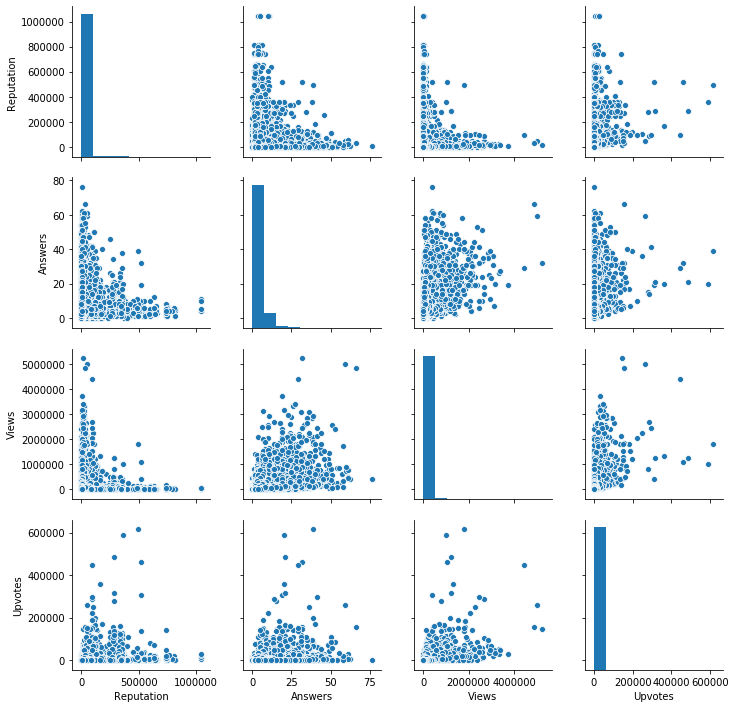

In [11]:
#Now let's analyze the data a bit
import seaborn as sns
sns.pairplot(dataset)

In [12]:
x=dataset.iloc[:,:-1].values#For x we have taken all the variables
y=dataset.iloc[:,4].values

In [14]:
#Let's create dummy variable for Column "TAG" as it is categorical
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder=LabelEncoder()
x[:,0]=labelencoder.fit_transform(x[:,0])
onehotencoder=OneHotEncoder(categorical_features=[0])
x=onehotencoder.fit_transform(x).toarray()
#Removing dummy variable trap
x=x[:,1:]

C:\Users\Finch\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Finch\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [15]:
#Import the regressor from sklearn
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)

In [17]:
#Dividing the data into training and tets set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [18]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [19]:
y_pred=regressor.predict(x_test)

In [20]:
#Let's check accuracy of our model
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8587283130436992
